# k Nearest Neighbors

<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html'>Regressor</a>
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html'>Classifier</a>

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from __future__ import division
from sklearn.datasets import load_iris

plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


#######
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9777777777777777


In [3]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

# metric

Есть разные метрики: <a href='http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html'>sklearn.neighbors.DistanceMetric¶</a>

Например, метрика Минковского:
<img src="../imgs/minkowski.svg">

<img src="../imgs/distances.png">

In [4]:
# “euclidean”   EuclideanDistance    sqrt(sum((x - y)^2))
# “manhattan”   ManhattanDistance    sum(|x - y|)
# “chebyshev”   ChebyshevDistance    max(|x - y2|)
# “minkowski”   MinkowskiDistance    sum(|x - y|^p)^(1/p)

Или вот крутые метрики из презентации Константина Вячеславовича Воронцова:<br>
<img src="../imgs/voron_slide.jpg">

# weights

<img src="../imgs/kernel_formula.jpg" width=600>
Есть разные ядерные функции:

<img src="../imgs/kernels2.png">

<img src="../imgs/kernel_formulas.jpg" width=400>

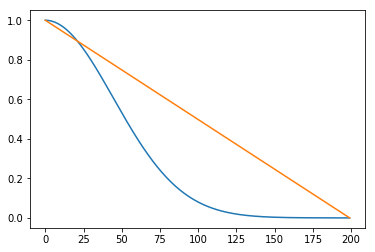

In [5]:
def gaussian_kernel(distances):
    if np.max(distances) == 0:
        return np.zeros(len(distances))
    distances_normalized = np.copy(distances) / np.max(distances)
    return np.e ** (-(distances_normalized ** 2) * 10)

x = np.arange(0, 200, 1.)
plt.plot(x, gaussian_kernel(x))
plt.plot(x, 1 - x/ max(x));

# Все параметры:

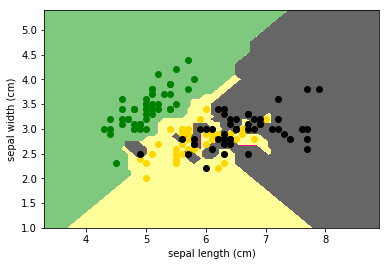

In [9]:
from sklearn.neighbors import KNeighborsClassifier

pair=[0, 1]
X = iris.data[:, [0, 1]]
y = iris.target

n_classes = 3
plot_colors = ['g', 'gold', 'black']
plot_step = 0.005

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


clf = KNeighborsClassifier(n_neighbors=1, 
                           metric='chebyshev', 
                           weights='distance',
                           p=2).fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='Accent')

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)

# Regression!

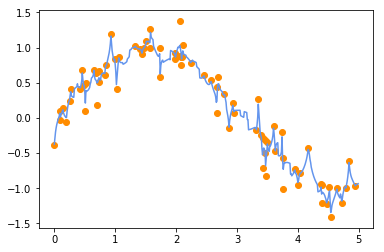

In [8]:
from sklearn.neighbors import KNeighborsRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
# y = np.piecewise(X.flatten(), 
#                  [X.flatten() < 3, X.flatten() >= 3], [-1, 1]).ravel()
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

clf = KNeighborsRegressor(n_neighbors=4, 
                          metric='chebyshev', 
                          weights='distance').fit(X, y)
y_ = clf.predict(X_test)
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

# Проклятие размерности: 
http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#the-curse-of-dimensionality
<img src="../imgs/the_curse.png">

## Выводы: 
- kNN - очень популярный алгоритм в тех случаях, когда объекты сравнимы и имеет место "похожесть" объектов.
- kNN сильно зависит от метрики. А значит и от масштаба признаков. Перед применением нужно привести признаки к одной шкале
- kNN плохо воспринимает большое (>100) количество признаков, т.к. объекты оказываются одинаково отдалены друг от друга в таких пространствах 